First 5 Rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Cluster counts:
cluster
0    129
1    119
2     85
Name: count, dtype: int64


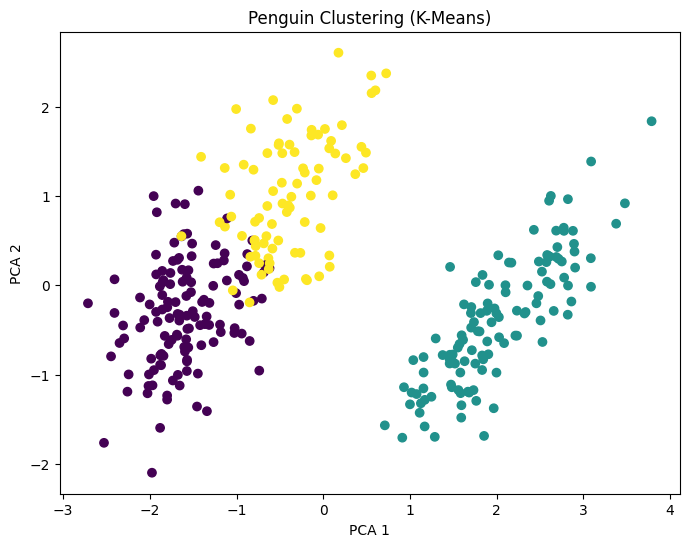


Silhouette Score: 0.446


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load a REAL existing dataset
df = sns.load_dataset("penguins")
print("First 5 Rows:")
print(df.head())

# 2. Select ONLY numeric columns (no missing values)
df = df.dropna()  # Remove rows with missing values
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

print("\nCluster counts:")
print(df['cluster'].value_counts())

# 5. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 6. Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'])
plt.title("Penguin Clustering (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 7. Clustering quality
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score: {sil_score:.3f}")